# Goal Optimizing

conversion rate is likely the most common work of a data scientist, and rightfully so.
The data revolution has a lot to do with the fact that now we are able to collect all sorts of data about people who buy something on our site as well as people who don't. This gives us a tremendous opportunity to understand what's working well (and potentially scale it even further) and what's not working well (and fix it).

The goal of this challenge is to build a model that predicts conversion rate and, based on the model, come up with ideas to improve re enue.
This challenge is significantly easier than all others in this collection. There are no dates, no tables to join, no feature engineering required, and the problem is really straightforward. Therefore, it is a great starting point to get familiar with data science take home challenges.

In [1]:
ls

conversion_data.csv
conversion_rate.ipynb
learning_curve.py
learning_curve.pyc
logistic_regression_classifier_analysis.py
random_forest_classifier_and_analysis.py


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
conv_rate = pd.read_csv('conversion_data.csv')

In [4]:
conv_rate.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


## Challenge Description
We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).
Your project is to:
- Predict conversion rate
- Come up with recommendations for the product team and the marketing team to improve conversion rate


In [5]:
conv_rate.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


max year is too high -- this must be an incorrect input

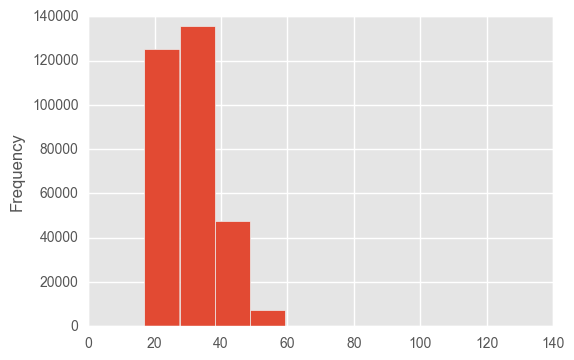

In [6]:
conv_rate['age'].plot(kind ='hist')

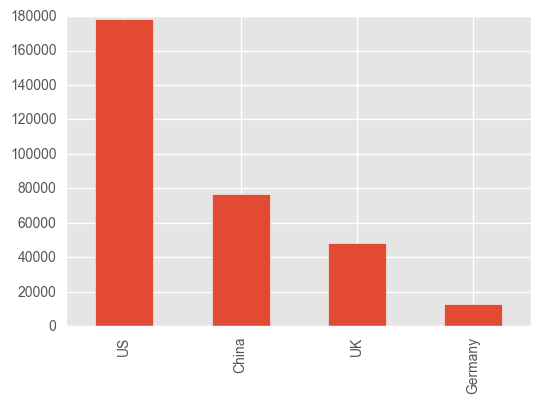

In [7]:
conv_rate['country'].value_counts().plot(kind ='bar')

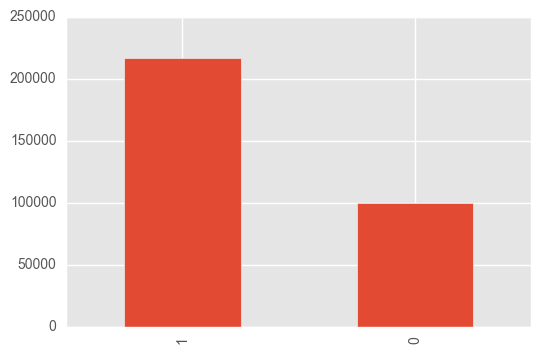

In [8]:
conv_rate['new_user'].value_counts().plot(kind ='bar')

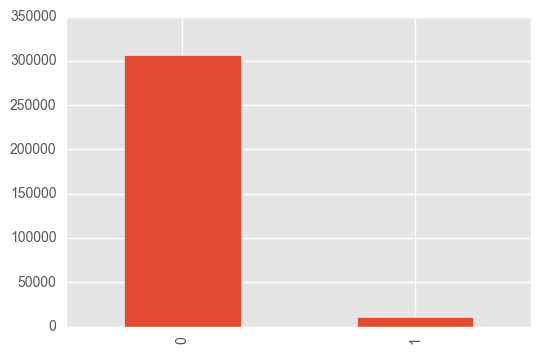

In [9]:
conv_rate['converted'].value_counts().plot(kind ='bar')

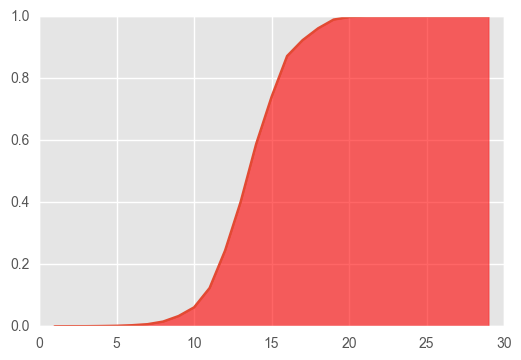

In [76]:
age = conv_rate.groupby('total_pages_visited').mean()['age']
converted = conv_rate.groupby('total_pages_visited').mean()['converted']
total_page_visited = conv_rate.groupby('total_pages_visited').mean().reset_index()['total_pages_visited']
plt.plot(total_page_visited,converted)
plt.fill_between(total_page_visited,converted,0,color='red',alpha = 0.6)
plt.show()


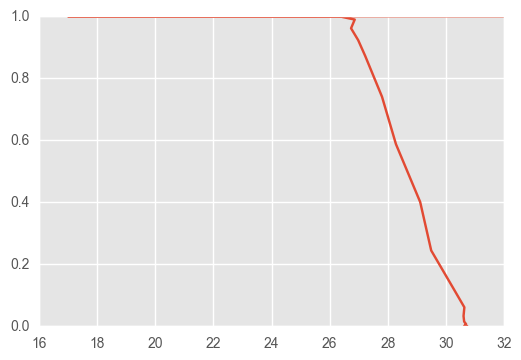

In [88]:
plt.plot(age,converted,fillstyle='bottom')
plt.show()

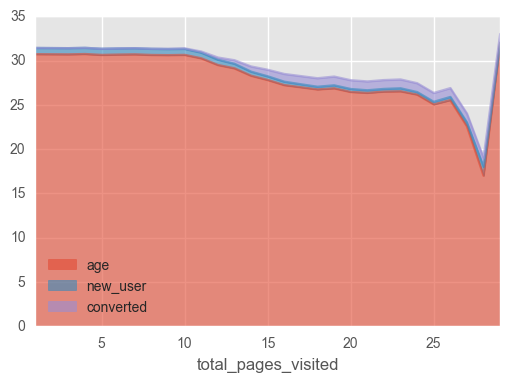

In [51]:
conv_rate.groupby('total_pages_visited').mean().plot.area(alpha = 0.6)

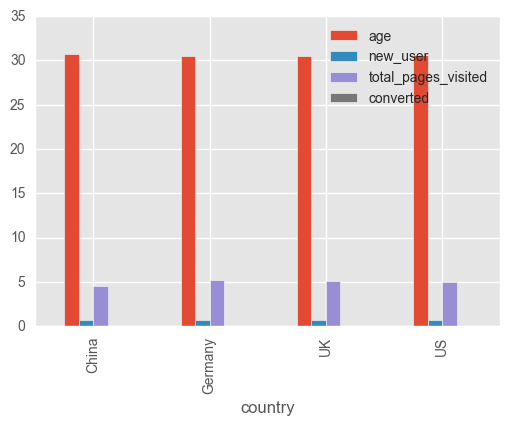

In [38]:
conv_rate.groupby('country').mean().plot(kind='bar')

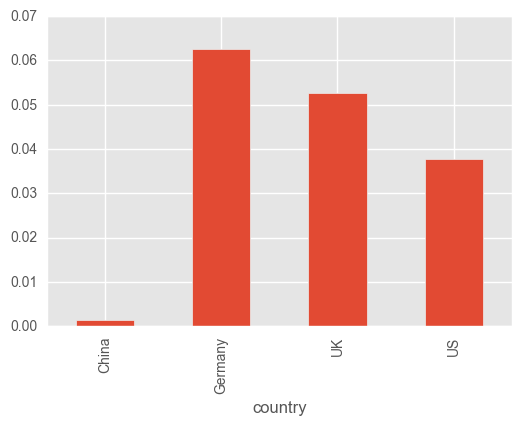

In [44]:
conv_rate.groupby('country').mean()['converted'].plot(kind='bar')

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


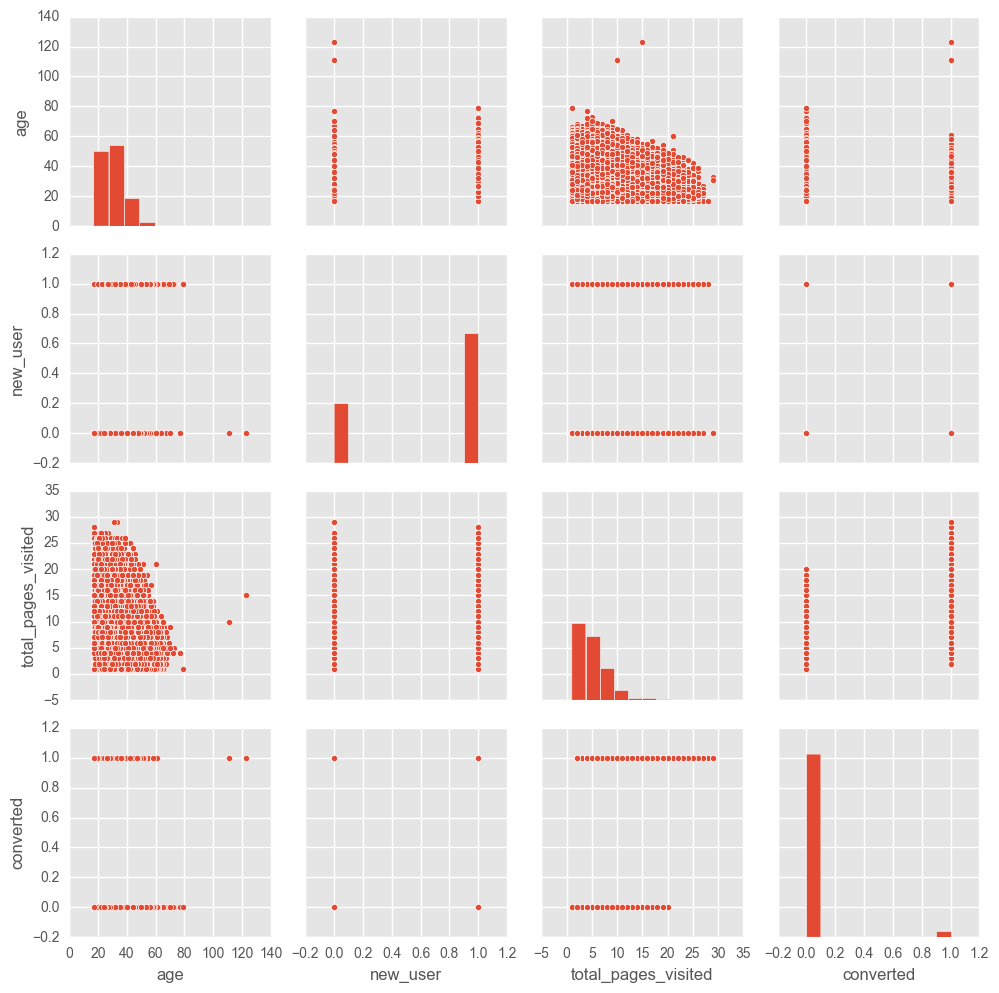

In [10]:
sns.pairplot(conv_rate)

In [11]:
dummies = pd.get_dummies(conv_rate[['country','source']])

In [12]:
conv_rate_df = pd.concat([dummies,conv_rate],axis = 1)

In [13]:
conv_rate_df = conv_rate_df.drop(['country','source'],axis = 1)

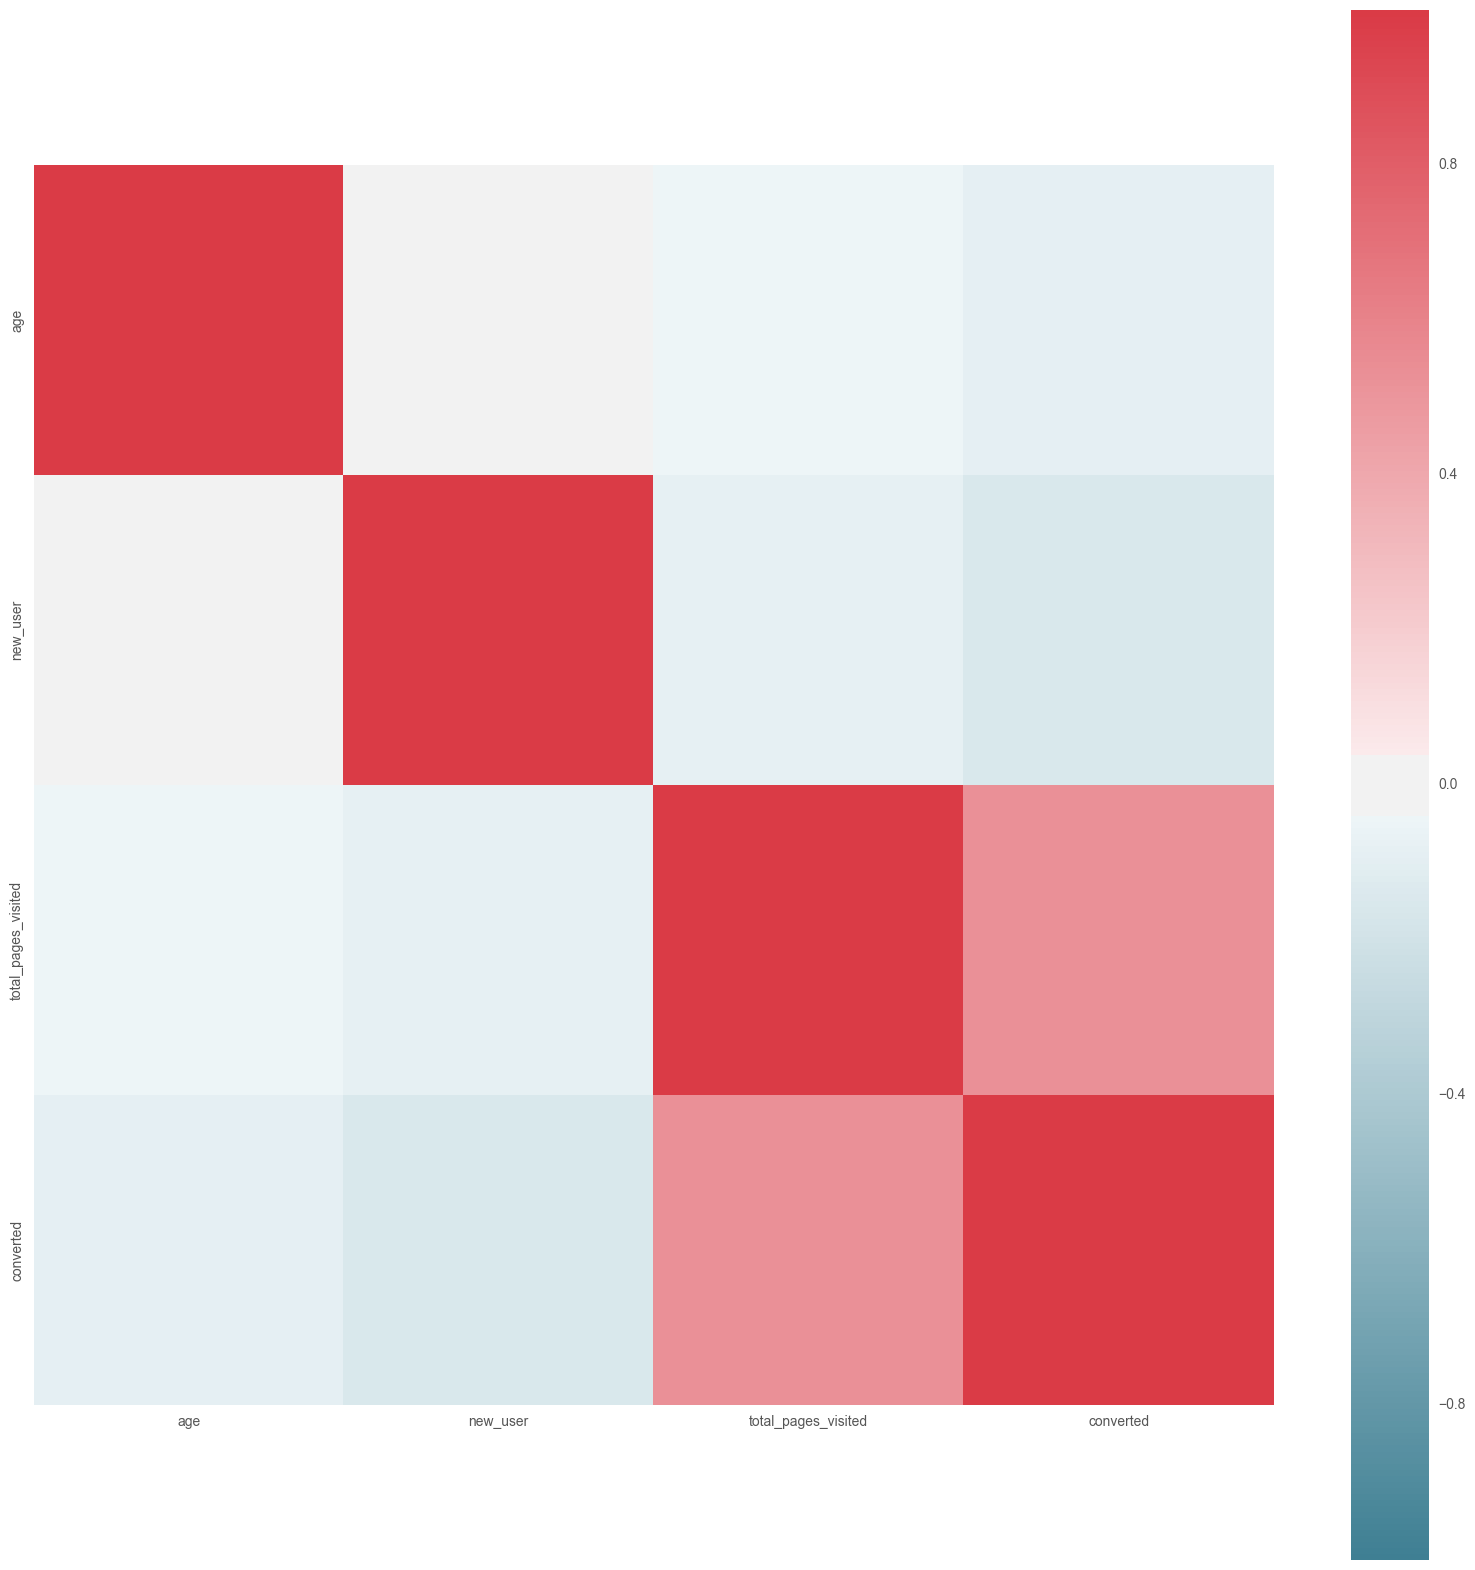

In [39]:
# Correction Matrix Plot
correlations = conv_rate.corr()
# plot correlation matrix
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
ticks = np.arange(0,9,1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(names)
# ax.set_yticklabels(names)
sns.heatmap(correlations, mask=np.zeros_like(correlations, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

# Lets make a binary classifier on our data

In [15]:
from sklearn.cross_validation import train_test_split
X,y = conv_rate_df.iloc[:,:-1],conv_rate_df.iloc[:,-1] 
print X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(316200, 10) (316200,)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Train")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Test")

    plt.legend(loc="best")
    return plt

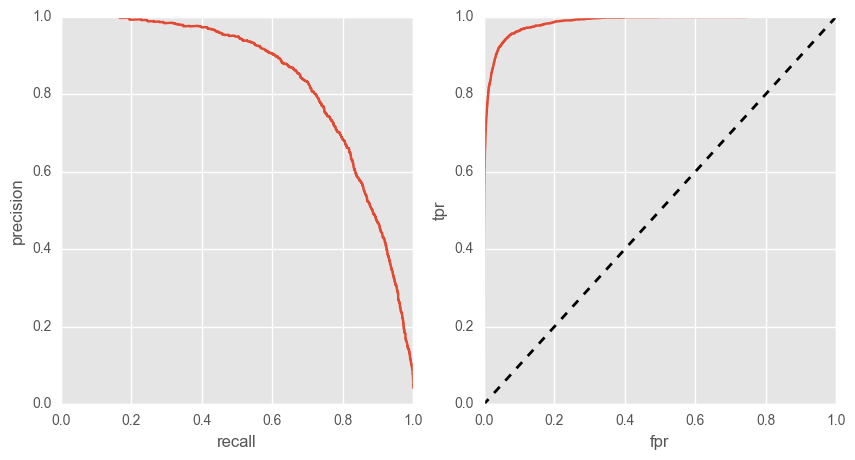

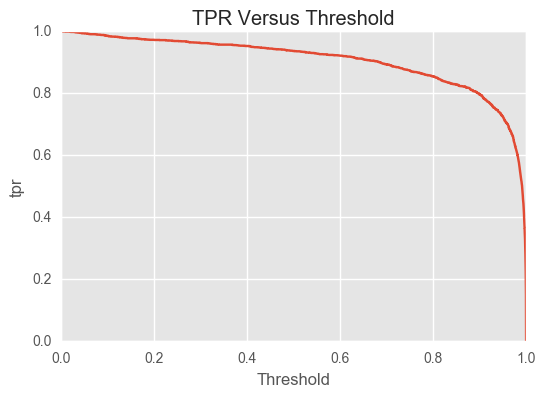

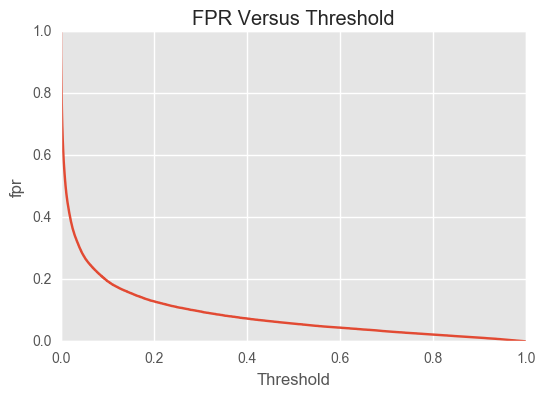

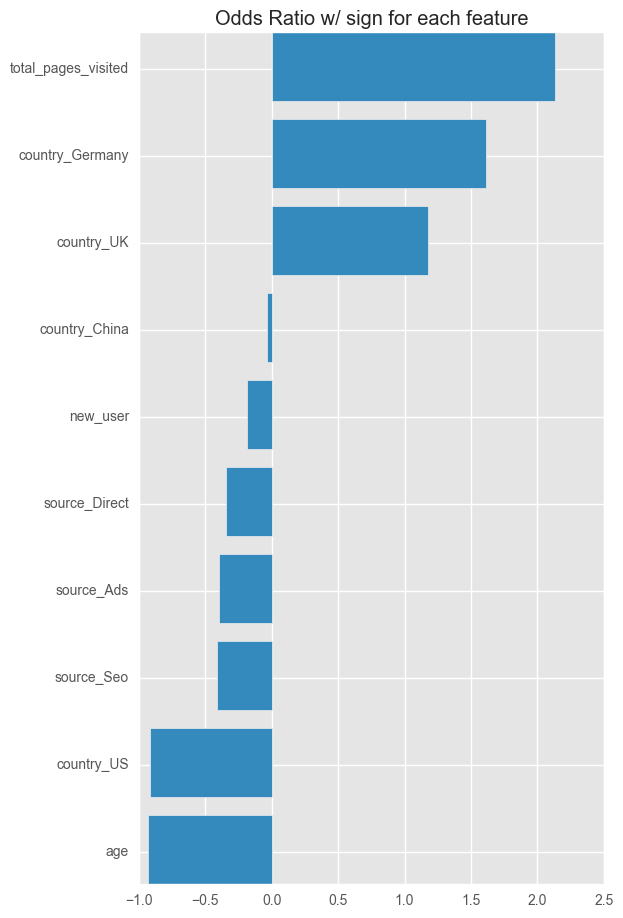

At threshold = 0.5
             precision    recall  f1-score   support

          0       1.00      0.94      0.97     61191
          1       0.36      0.94      0.51      2049

avg / total       0.98      0.94      0.95     63240

accuracy:  0.942820999367


In [17]:
import ml_insights as mli
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve

lr = LogisticRegression(class_weight ='balanced')
lr.fit(X_train,y_train)
y_pred = lr.predict_proba(X_test)[:,1]
prec, rec, thresh_ = precision_recall_curve(y_test,y_pred)
fpr,tpr, thresh = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(rec,prec)
plt.xlabel('recall')
plt.ylabel('precision')
plt.subplot(1,2,2)
plt.plot(fpr,tpr)
plt.plot([1,0], [1,0], 'k--', lw = 2)
plt.xlabel('fpr')
plt.ylabel('tpr')

plt.show()
# F1 = 2 * (prec * rec) / (prec + rec)
thresh = list(thresh)
# thresh.append(1)
plt.plot(thresh,tpr)
plt.title('TPR Versus Threshold')
plt.ylabel('tpr')
plt.xlabel('Threshold')
plt.show()

plt.show()
# F1 = 2 * (prec * rec) / (prec + rec)
thresh = list(thresh)
# thresh.append(1)
plt.plot(thresh,fpr)
plt.title('FPR Versus Threshold')
plt.ylabel('fpr')
plt.xlabel('Threshold')
plt.show()

odds = np.exp(lr.coef_[0])*np.sign(lr.coef_[0])
sorted_index = odds.argsort()
fig, ax = plt.subplots(figsize=(6, 11))  
width = 0.75 # the width of the bars 
ind = np.arange(X_test.shape[1])  # the x locations for the groups
ax.set_yticks(ind+width/2)
ax.set_yticklabels(X_test.columns[sorted_index])
ax.barh(ind, odds[sorted_index])
plt.title('Odds Ratio w/ sign for each feature')
plt.show()

print("At threshold = 0.5")
# It is worse to class a customer as good when they are bad, 
# than it is to class a customer as bad when they are good.
print metrics.classification_report(y_test,y_pred > 0.5)
print 'accuracy: ',metrics.accuracy_score(y_test,y_pred > 0.5)

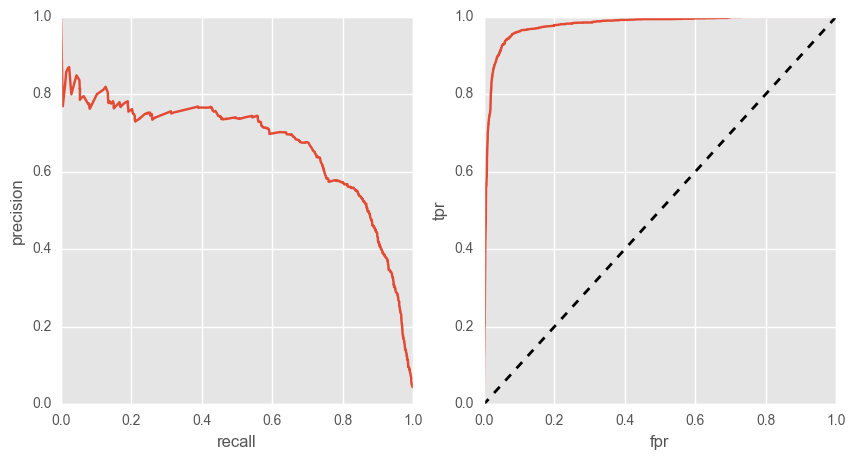

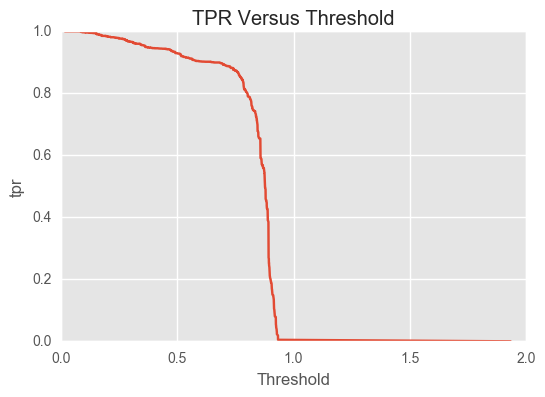

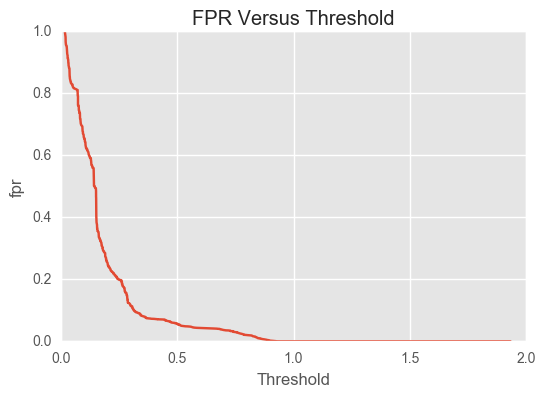

At threshold = 0.5
             precision    recall  f1-score   support

          0       1.00      0.94      0.97     61191
          1       0.36      0.94      0.51      2049

avg / total       0.98      0.94      0.95     63240

accuracy:  0.942820999367


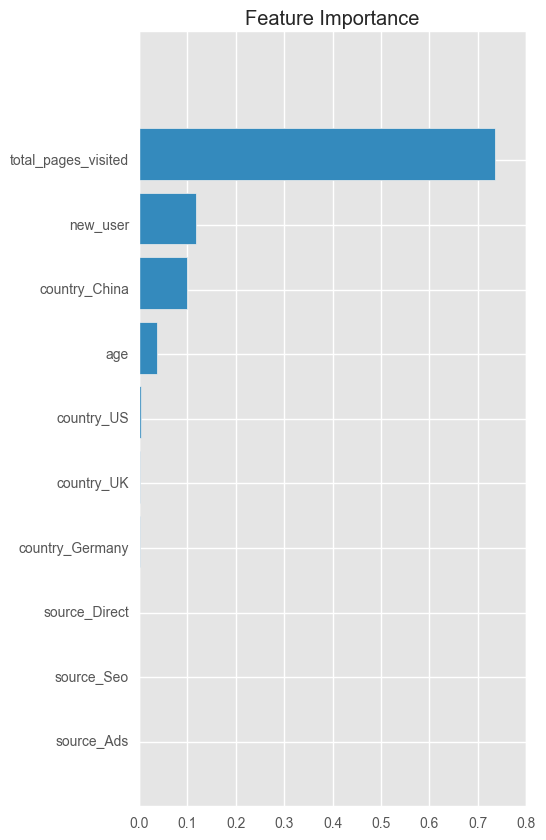

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve
# X_train, X_test, y_train,y_test = train_test_split(features,target,test_size =  0.22)
rfc = RandomForestClassifier(n_estimators = 20,n_jobs=-1,max_depth=4,class_weight = 'balanced')

rfc.fit(X_train,y_train)
predict = rfc.predict_proba(X_test)[:,1]
prec, rec, thresh_ = precision_recall_curve(y_test,predict)
fpr,tpr, thresh2 = roc_curve(y_test,predict)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(rec,prec)

plt.xlabel('recall')
plt.ylabel('precision')
plt.subplot(1,2,2)
plt.plot(fpr,tpr)
plt.plot([1,0], [1,0], 'k--', lw=2)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

# F1 = 2 * (prec * rec) / (prec + rec)
thresh = list(thresh)
# thresh.append(1)
plt.plot(thresh2,tpr)
plt.title('TPR Versus Threshold')
plt.ylabel('tpr')
plt.xlabel('Threshold')
plt.show()

# F1 = 2 * (prec * rec) / (prec + rec)
thresh = list(thresh2)
# thresh.append(1)
plt.plot(thresh,fpr)
plt.title('FPR Versus Threshold')
plt.ylabel('fpr')
plt.xlabel('Threshold')
plt.show()

sort_index = np.argsort(rfc.feature_importances_)
importances = rfc.feature_importances_
sort_importances = importances[sort_index]
# plt.subplot(1,2,1)
fig, ax = plt.subplots(figsize =(5,10))
ind = np.array(range(len(X_test.columns[sort_index])))+.7
# plt.figure(figsize = (10,20))

plt.barh(ind,sort_importances);
ax.set_yticks(ind + .3);
ax.set_yticklabels((X_test.columns[sort_index]))
plt.title('Feature Importance')

print("At threshold = 0.5")
print metrics.classification_report(y_test,y_pred>0.5)
print 'accuracy: ',metrics.accuracy_score(y_test,y_pred>0.5)

<module 'matplotlib.pyplot' from '//anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

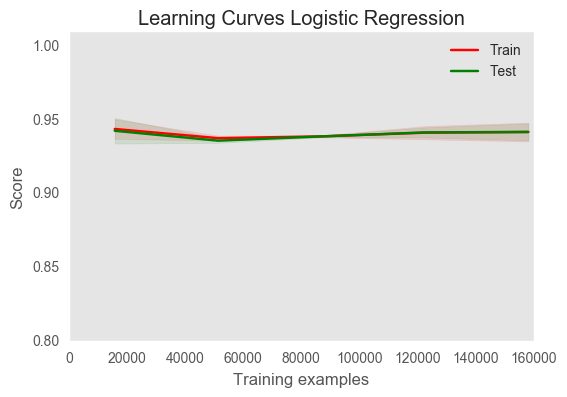

In [20]:
title = "Learning Curves Logistic Regression"
plot_learning_curve(rfc, title, X, y, (0.8, 1.01), cv=2)

<module 'matplotlib.pyplot' from '//anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

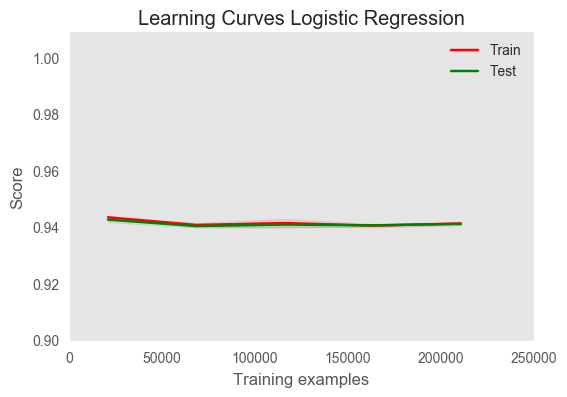

In [23]:
plot_learning_curve(lr, title, X, y, (0.9, 1.01), cv=3)